In [353]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [354]:
dataset = pd.read_csv('Advertising.csv')

In [355]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [356]:
dataset.rename({'Unnamed: 0':'Id'}, axis=1, inplace=True)

In [357]:
dataset.shape

(200, 5)

In [358]:
dataset.head()

,Id,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [359]:
dataset.isna().sum()

Id           0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [360]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,200.0,100.5000,57.879185,1.0,50.750,100.50,150.250,200.0
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [361]:
dataset.drop(columns=['Id'], axis=1, inplace=True)

In [362]:
features = dataset.drop(columns=['Sales'], axis=1)

target = dataset['Sales']

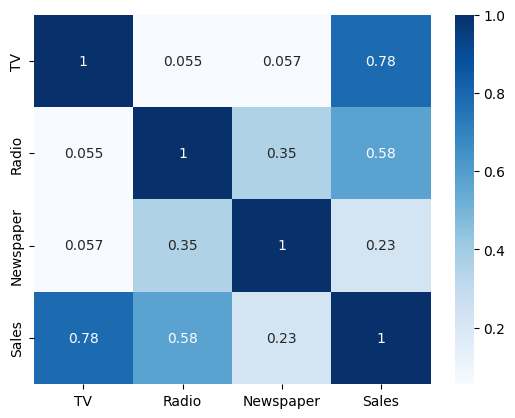

In [363]:
sns.heatmap(dataset.corr(), annot=True, cmap='Blues')
plt.show()

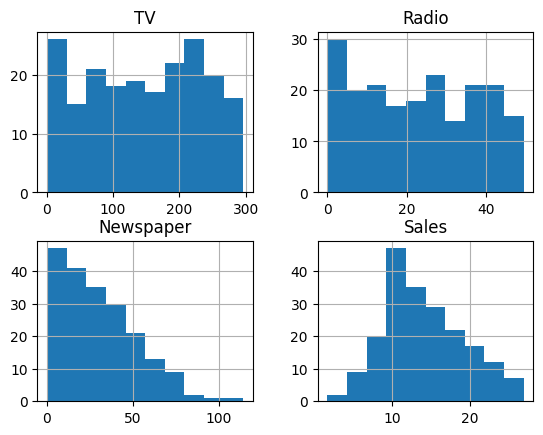

In [364]:
dataset.hist()
plt.show()

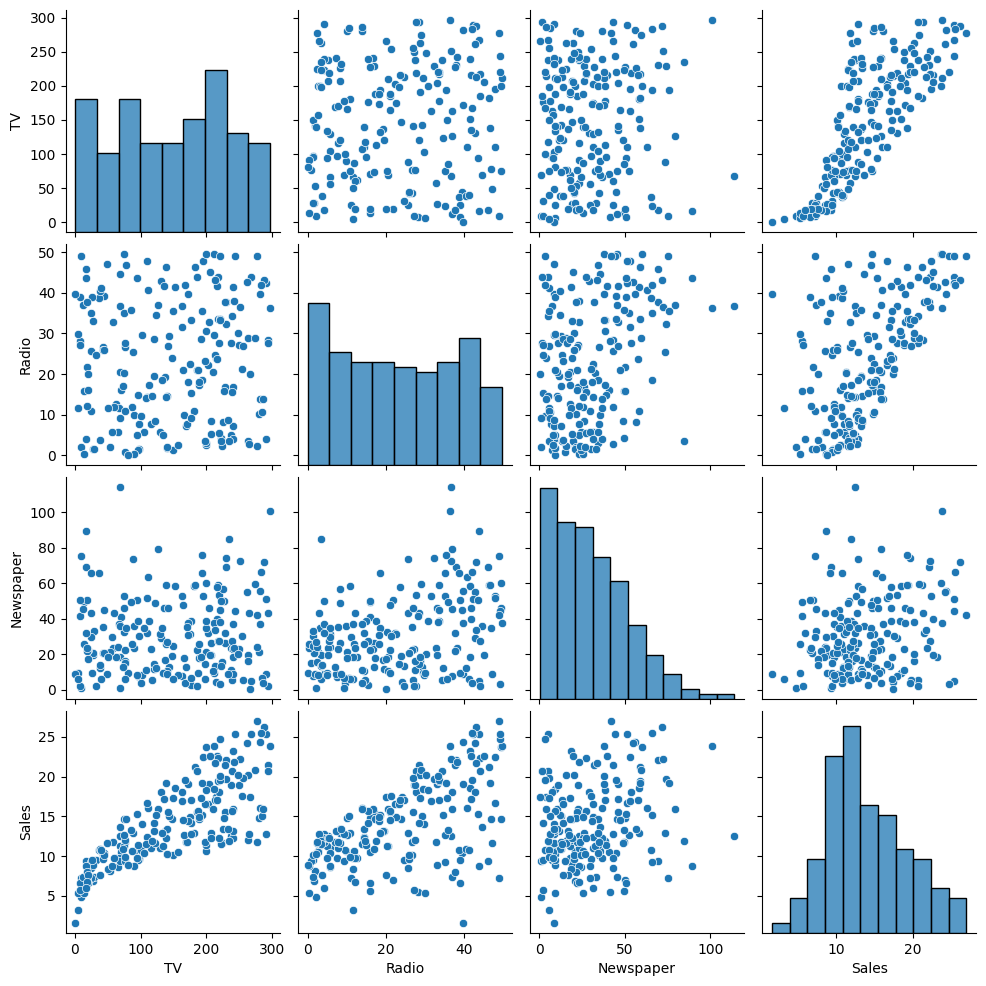

In [365]:
sns.pairplot(dataset)
plt.show()

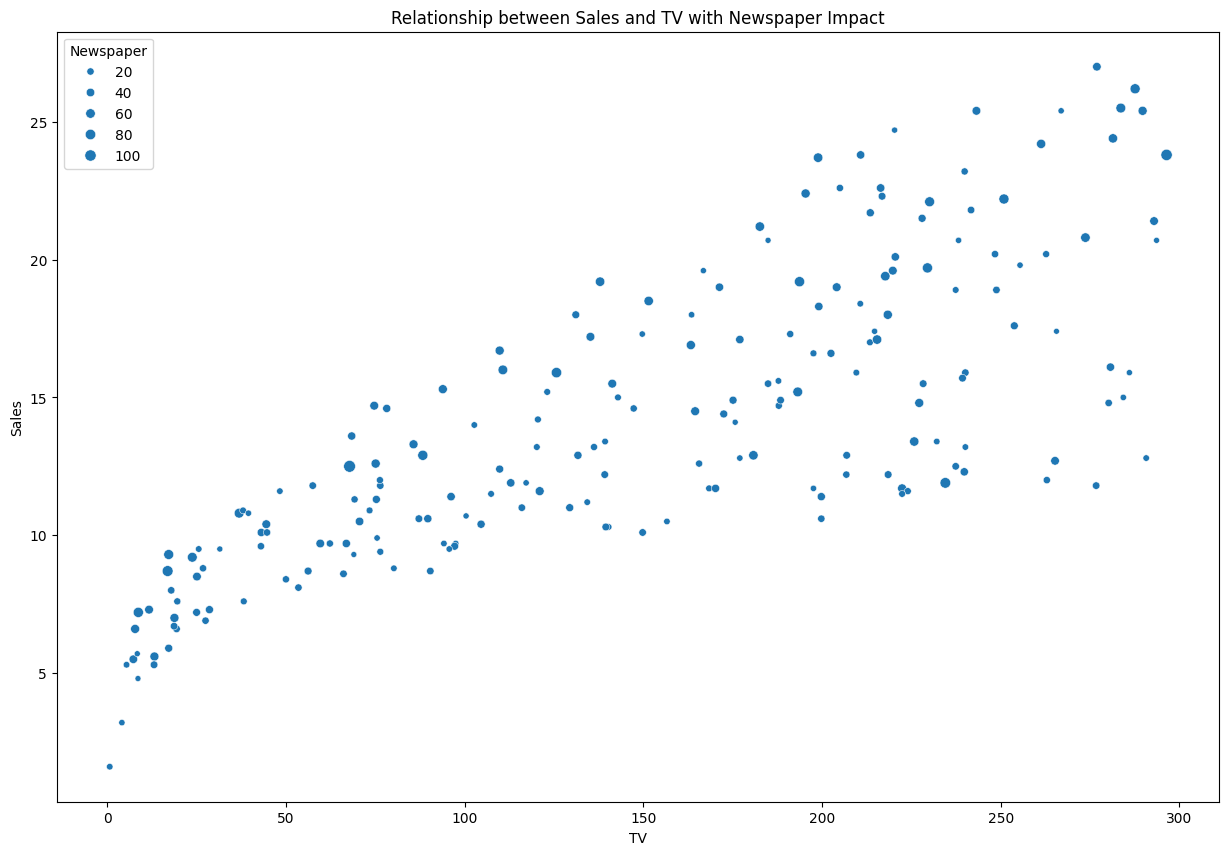

In [366]:
plt.figure(figsize=(15, 10))
sns.scatterplot(dataset, x='TV', y='Sales',  size='Newspaper', legend=True)
plt.title('Relationship between Sales and TV with Newspaper Impact')
plt.show()

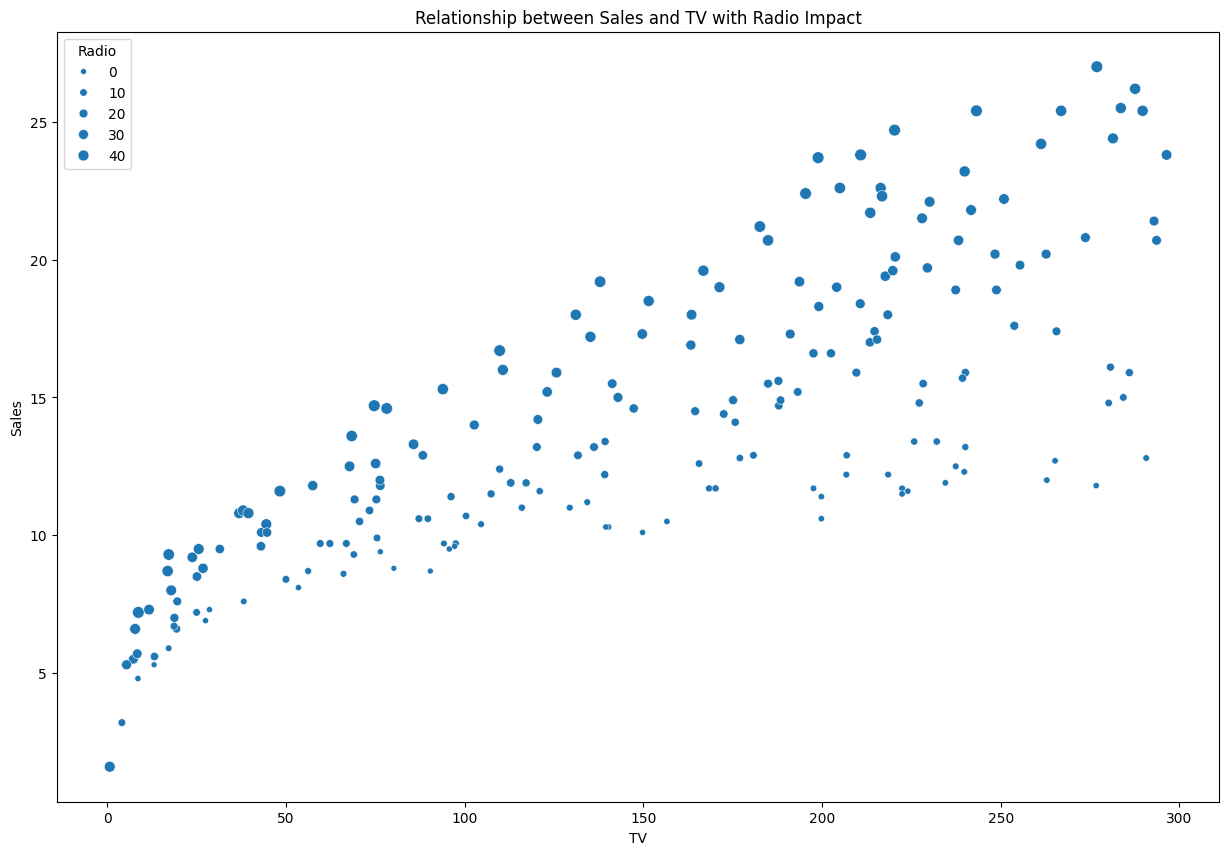

In [367]:
plt.figure(figsize=(15, 10))
sns.scatterplot(dataset, x='TV', y='Sales',  size='Radio', legend=True)
plt.title('Relationship between Sales and TV with Radio Impact')
plt.show()

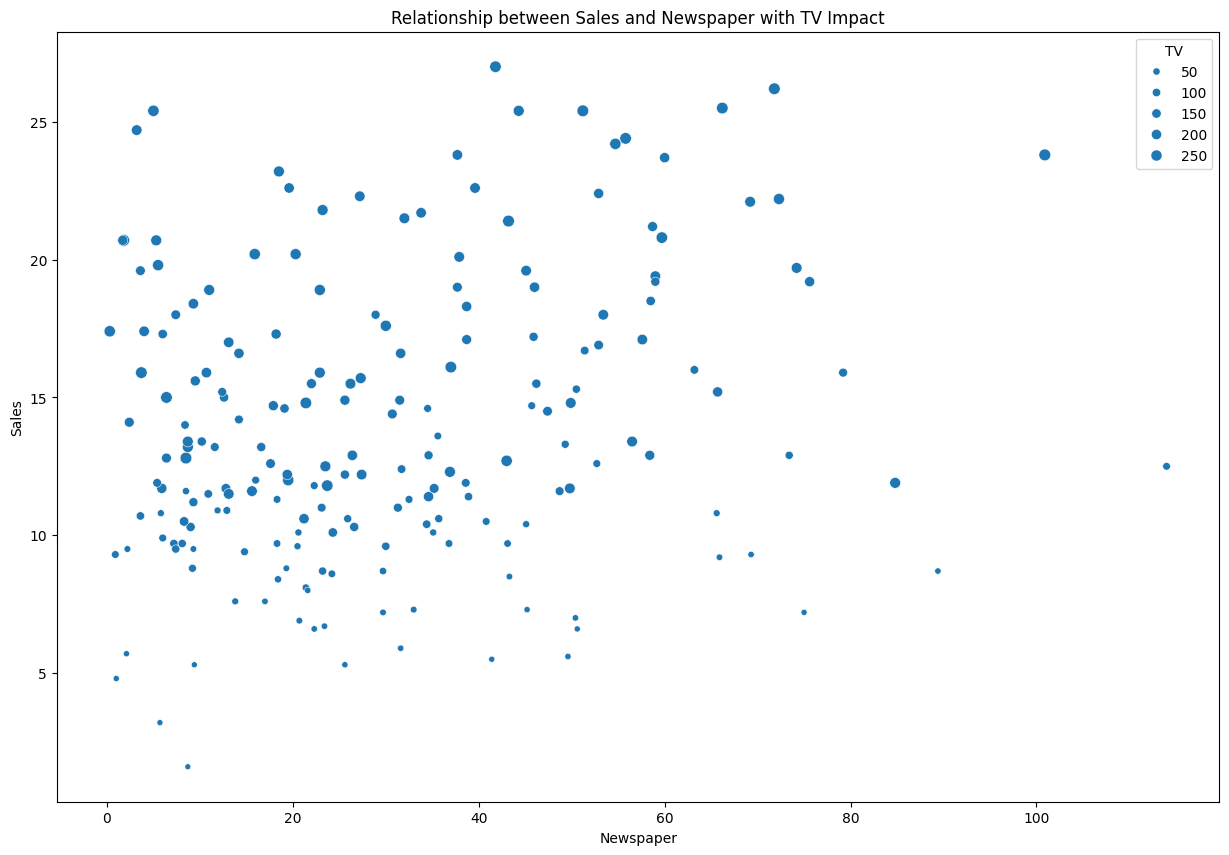

In [368]:
plt.figure(figsize=(15, 10))
sns.scatterplot(dataset, x='Newspaper', y='Sales',  size='TV', legend=True)
plt.title('Relationship between Sales and Newspaper with TV Impact')
plt.show()

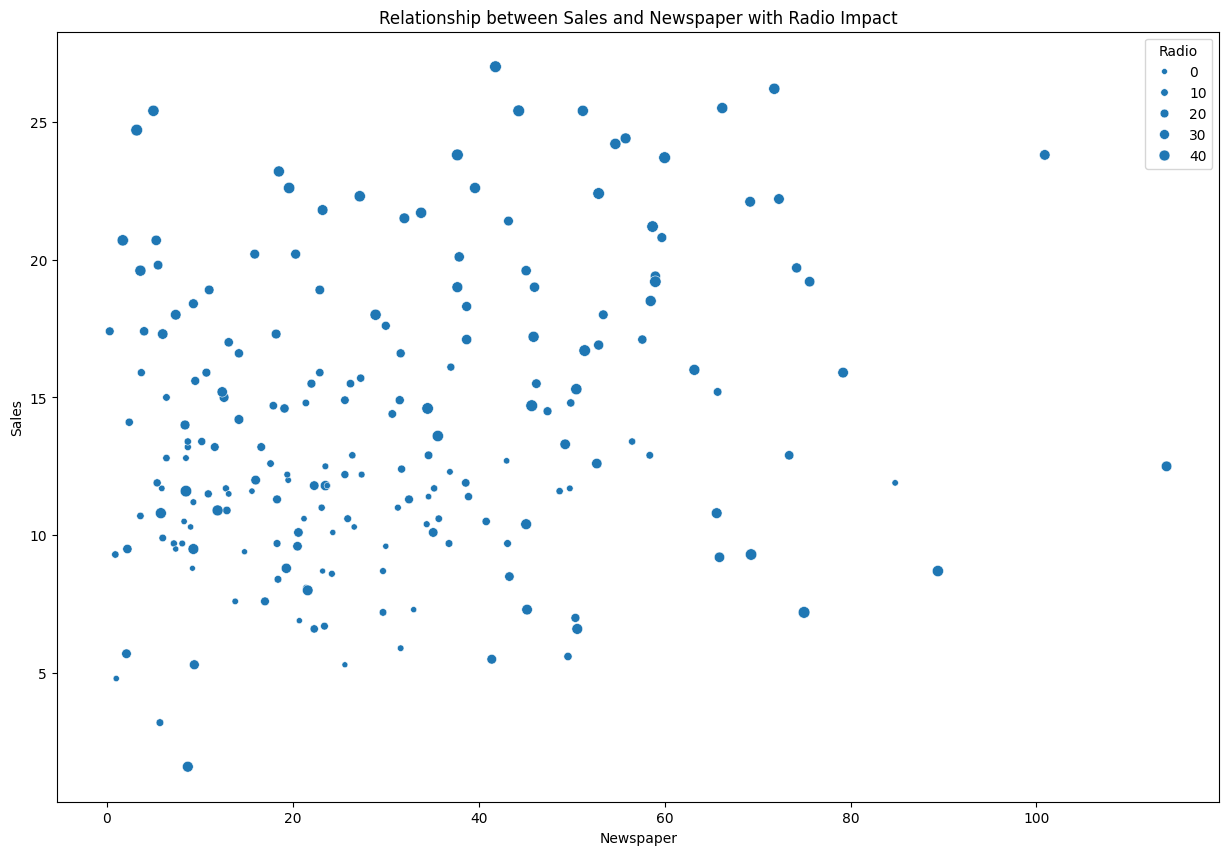

In [369]:
plt.figure(figsize=(15, 10))
sns.scatterplot(dataset, x='Newspaper', y='Sales',  size='Radio', legend=True)
plt.title('Relationship between Sales and Newspaper with Radio Impact')
plt.show()

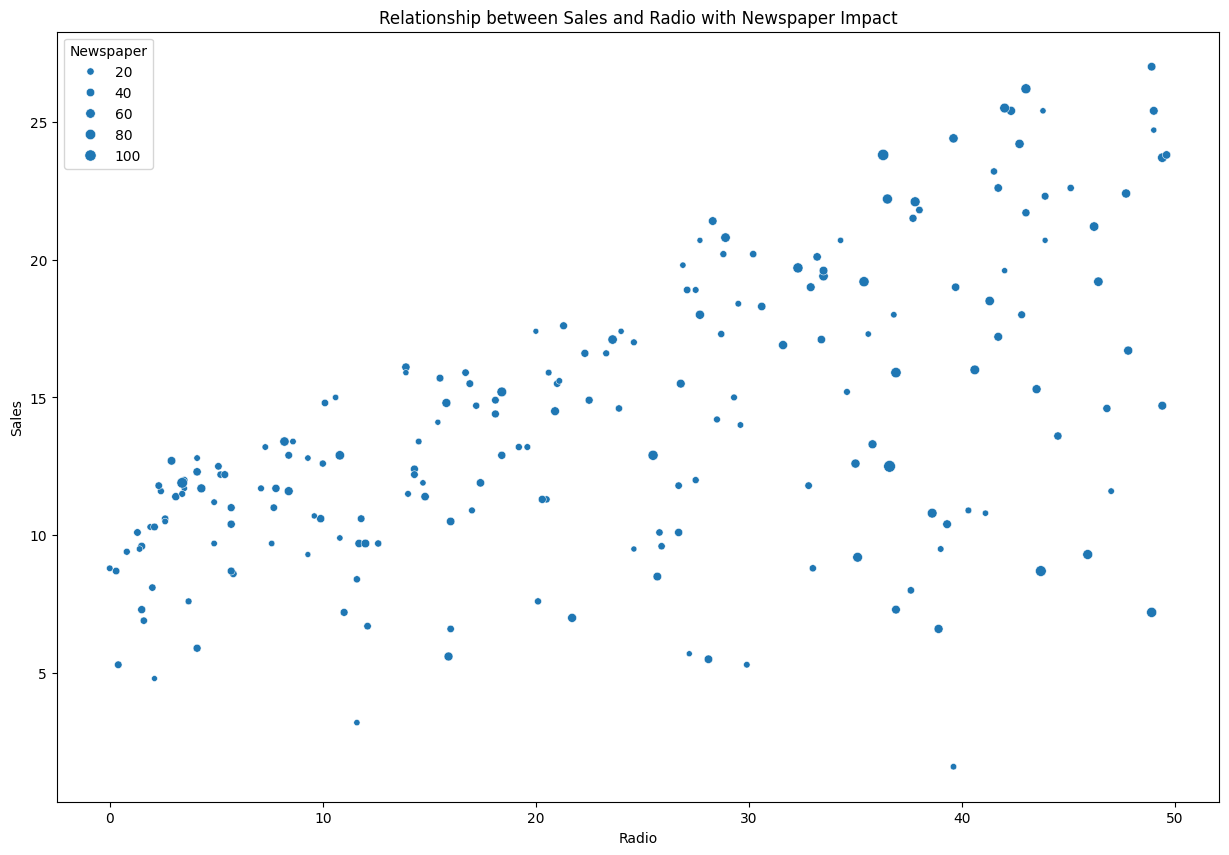

In [370]:
plt.figure(figsize=(15, 10))
sns.scatterplot(dataset, x='Radio', y='Sales',  size='Newspaper', legend=True)
plt.title('Relationship between Sales and Radio with Newspaper Impact')
plt.show()

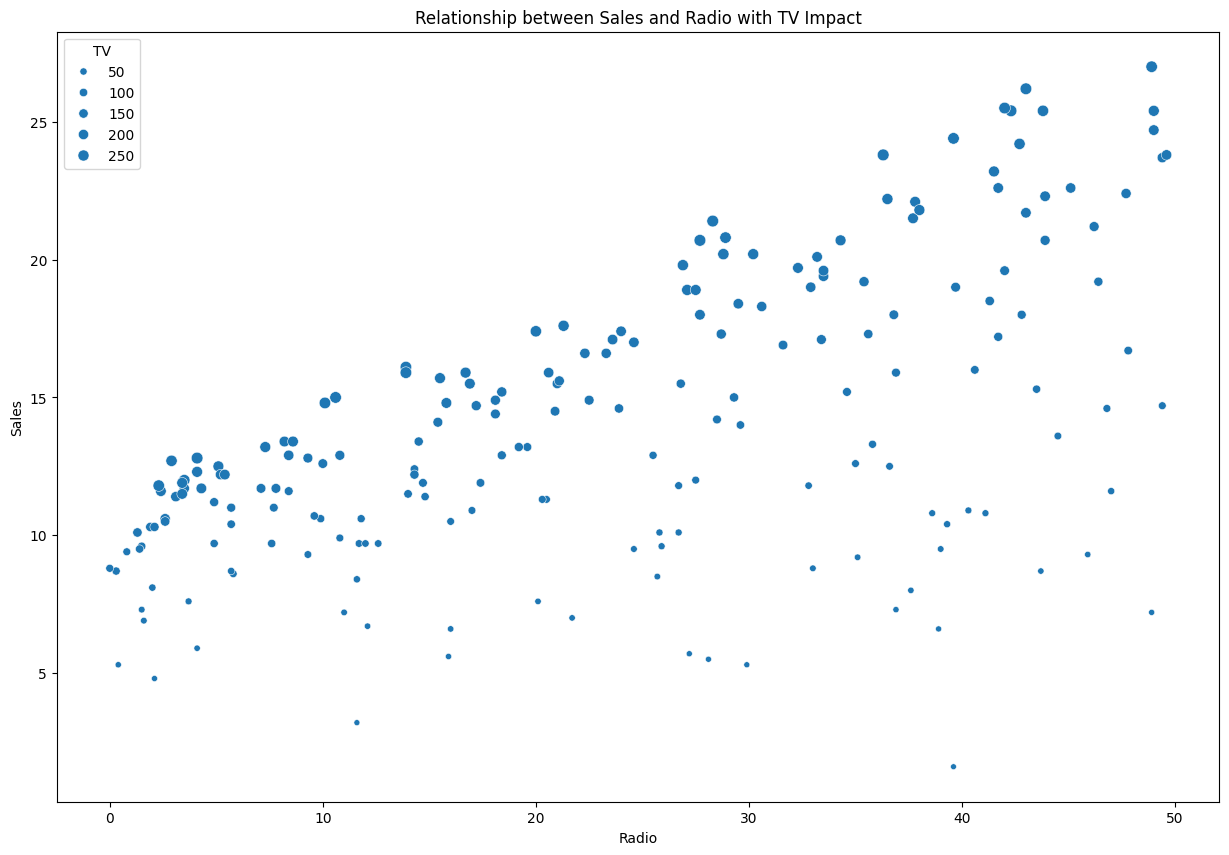

In [371]:
plt.figure(figsize=(15, 10))
sns.scatterplot(dataset, x='Radio', y='Sales',  size='TV', legend=True)
plt.title('Relationship between Sales and Radio with TV Impact')
plt.show()

In [372]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [373]:
models = [
    ('Linear Regressor', LinearRegression()),
    ('Ridge', Ridge()),
    ('Lasso', Lasso()),
    ('Random Forest Regressor', RandomForestRegressor(random_state=42)),
    ('Decision Tree Regressor', DecisionTreeRegressor(random_state=42))
]

Linear Regressor
The accuracy is 0.8609466508230368
The Mean Absolute Error is 1.5116692224549086
The Root Mean Squared Error is 1.9485372043446387
The Mean CrossValidation Score of 5 CV's is 0.8485717572447349


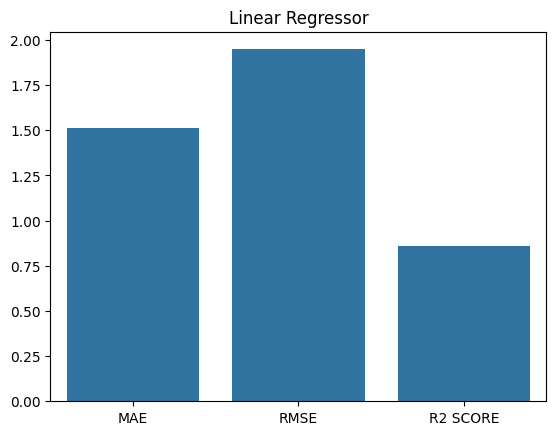

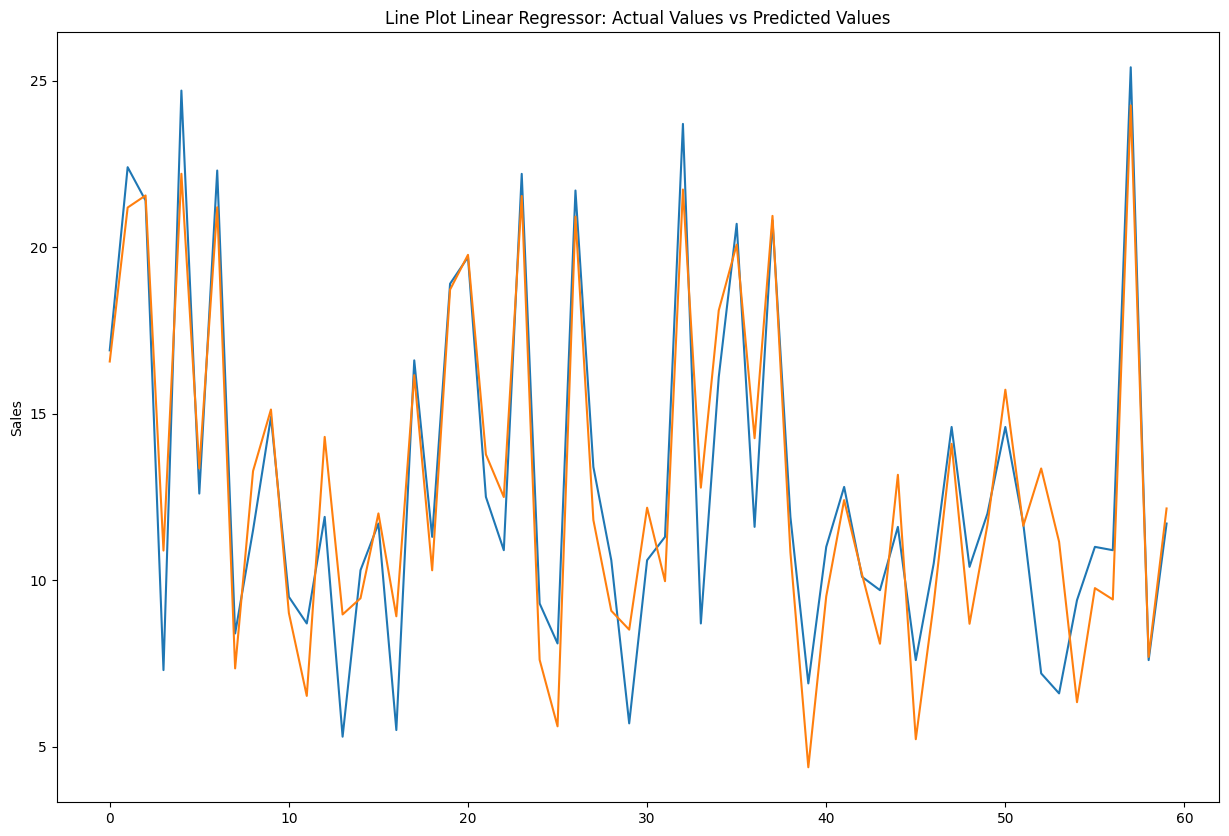

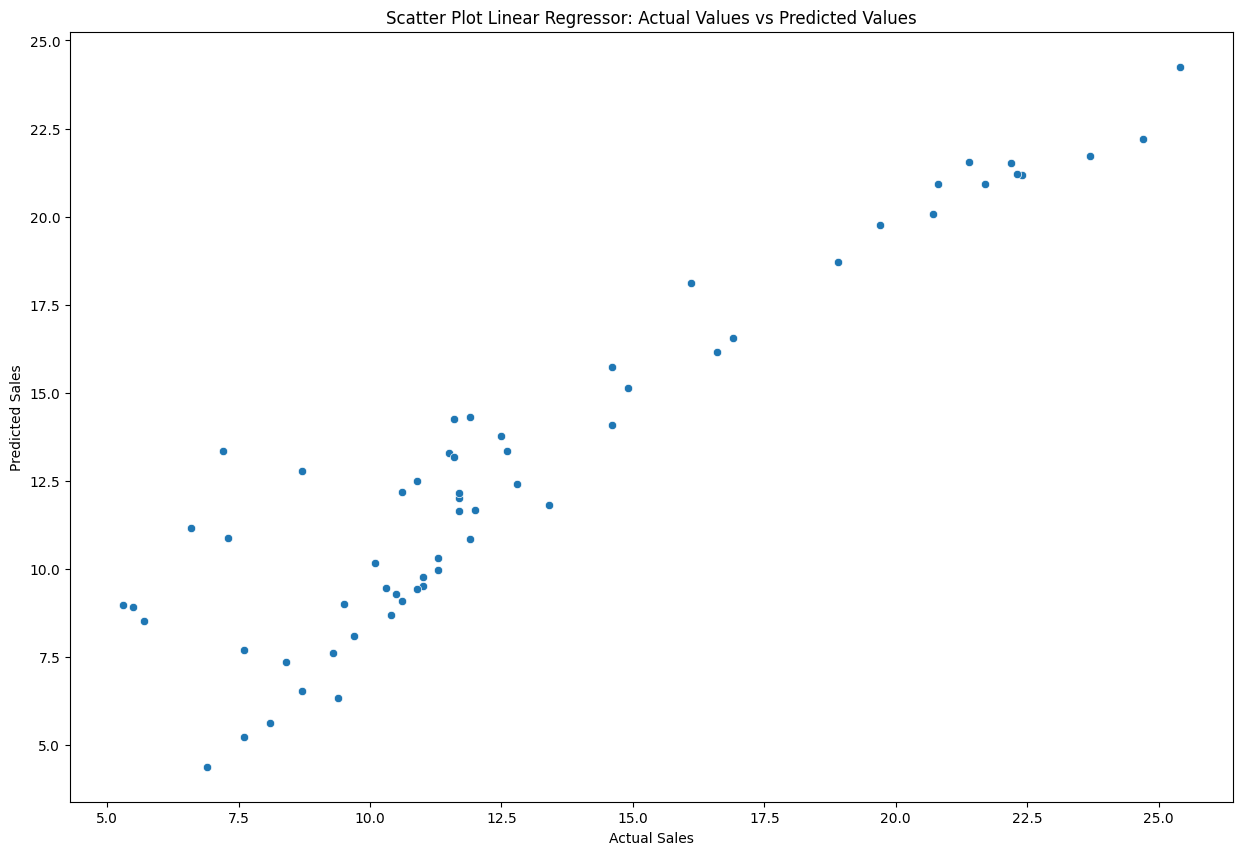

Ridge
The accuracy is 0.8609505096450262
The Mean Absolute Error is 1.511659223816003
The Root Mean Squared Error is 1.948510167561917
The Mean CrossValidation Score of 5 CV's is 0.8485815283191919


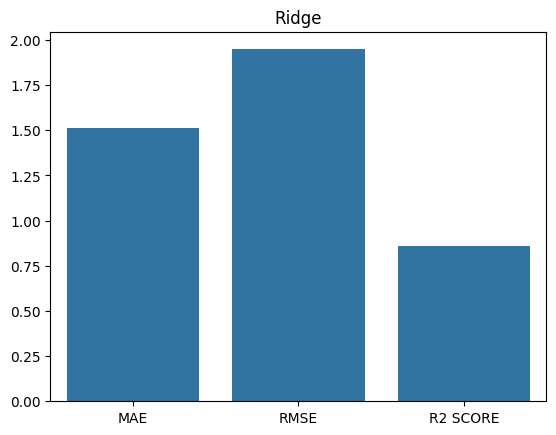

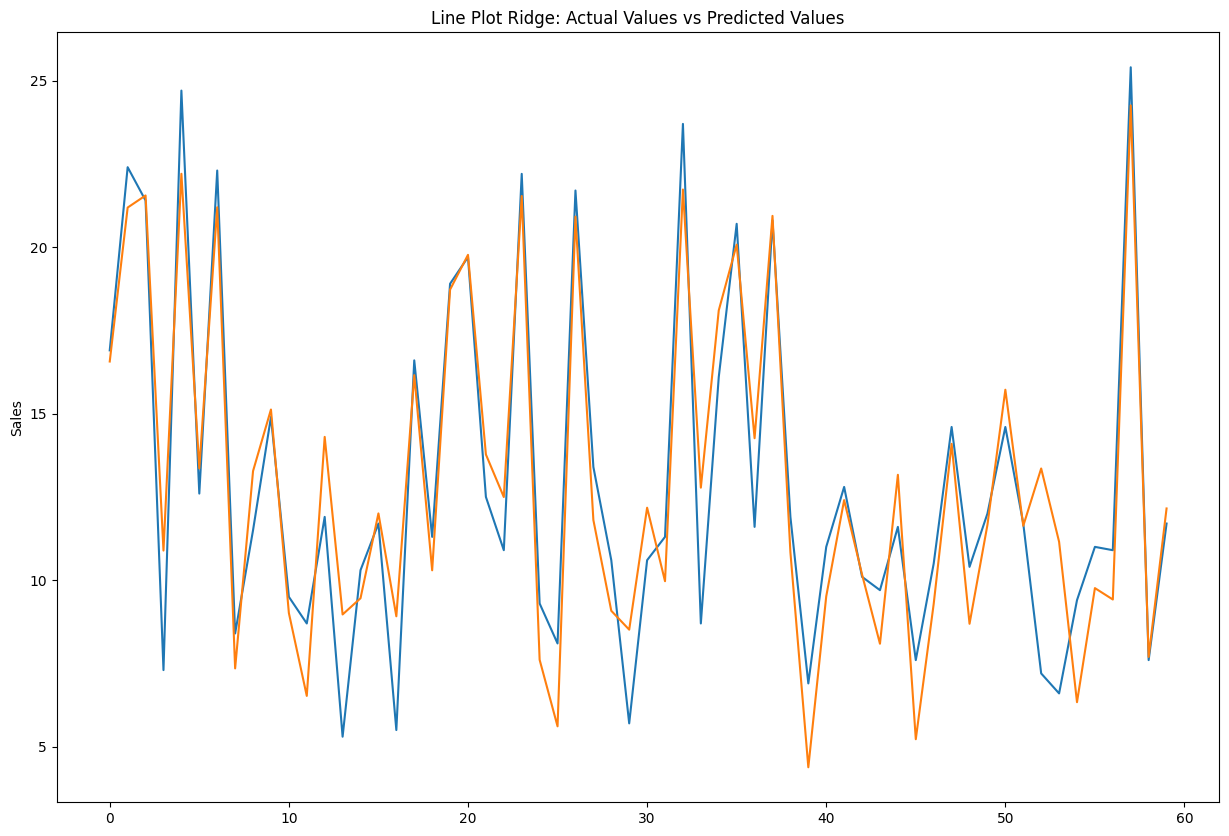

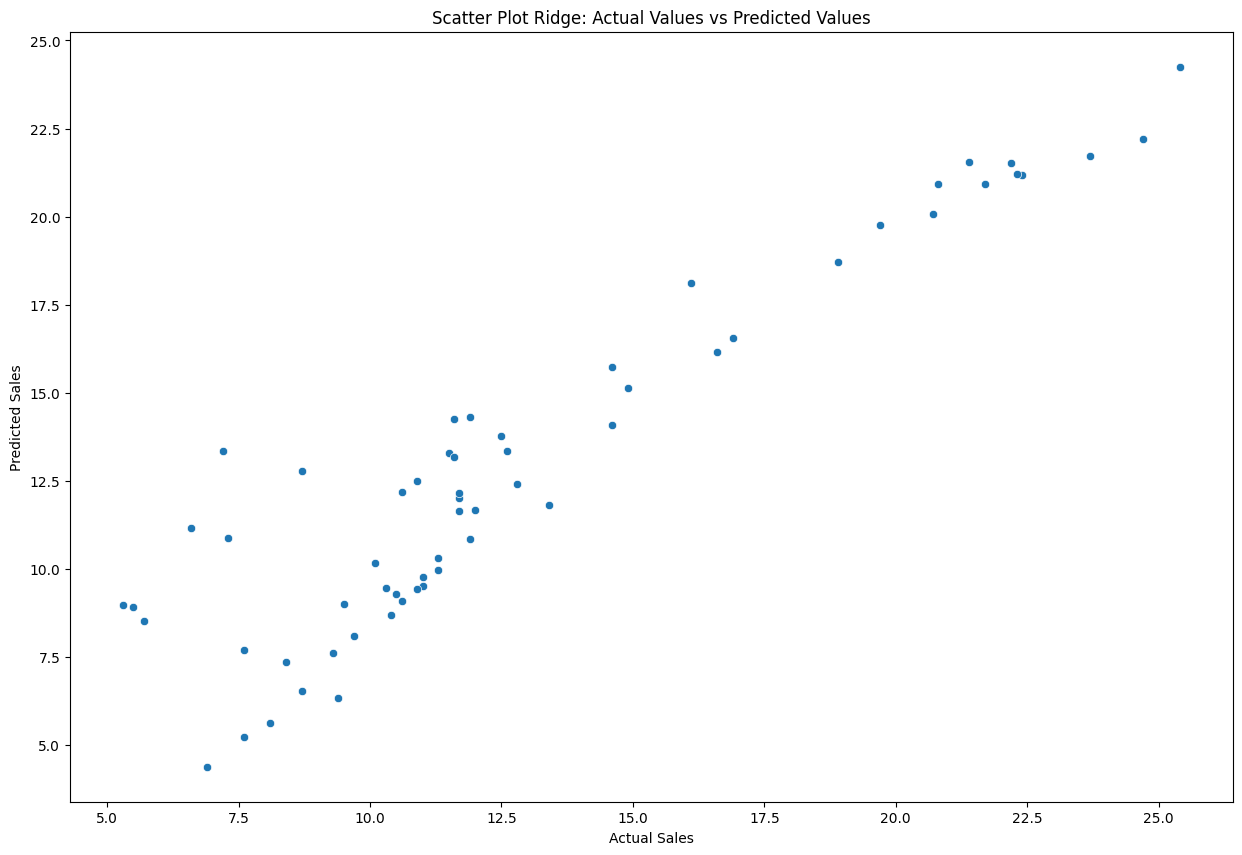

Lasso
The accuracy is 0.8651496069722558
The Mean Absolute Error is 1.4903333498768965
The Root Mean Squared Error is 1.9188635087516304
The Mean CrossValidation Score of 5 CV's is 0.8509344467081503


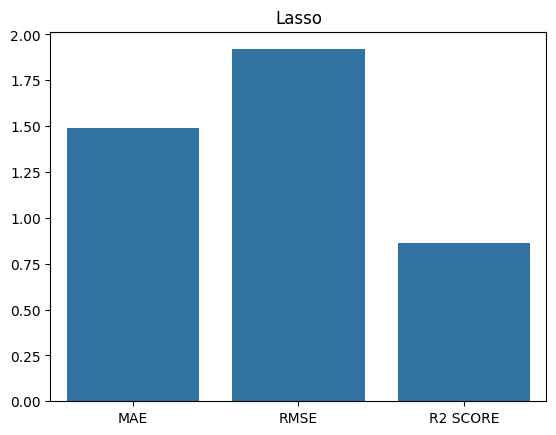

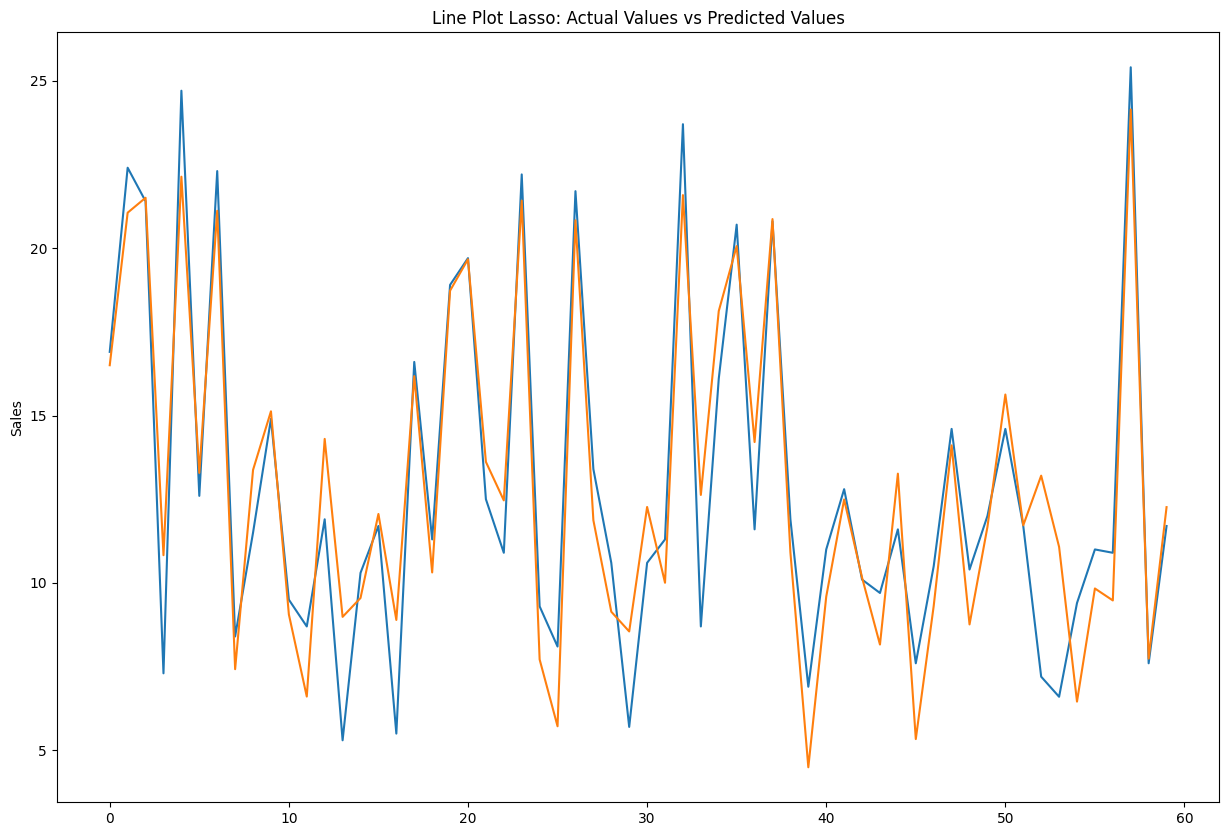

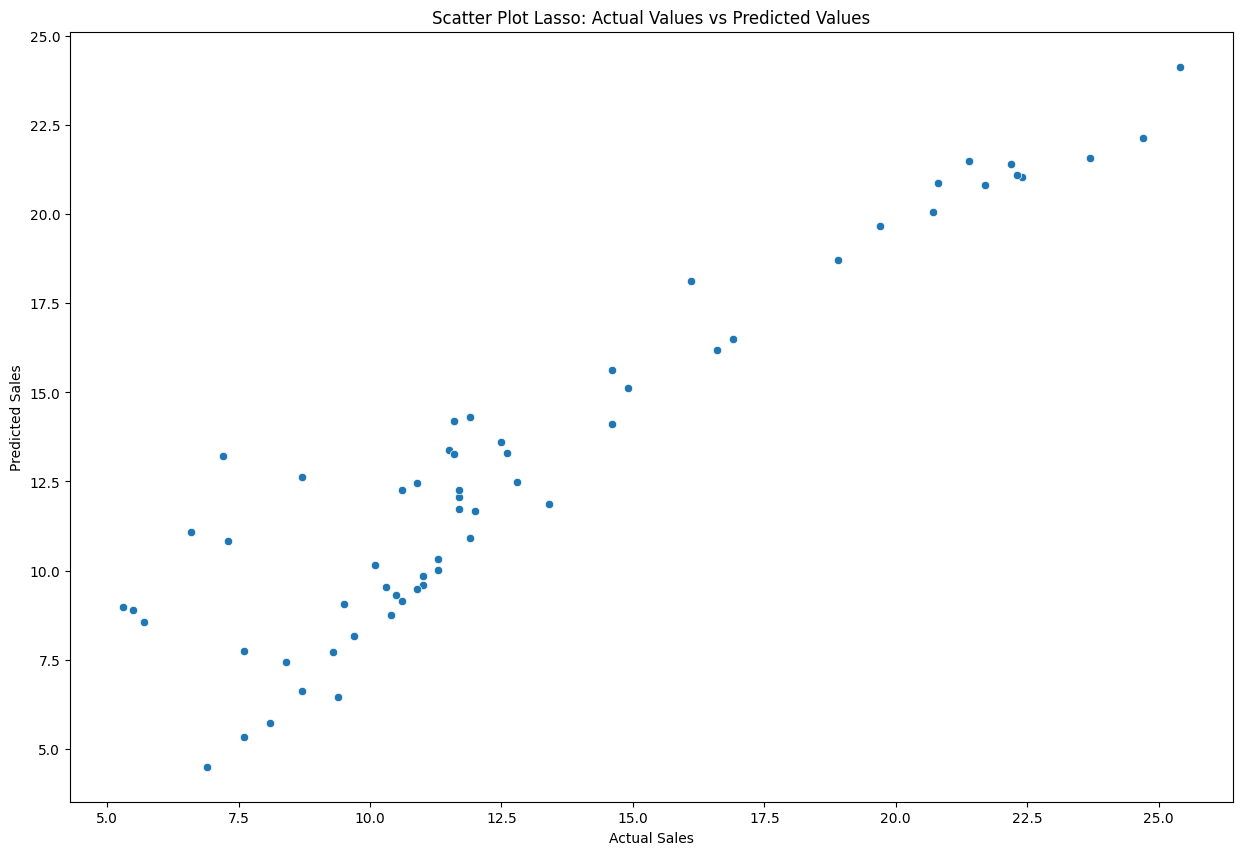

Random Forest Regressor
The accuracy is 0.9831207131396928
The Mean Absolute Error is 0.569949999999999
The Root Mean Squared Error is 0.6788831391827801
The Mean CrossValidation Score of 5 CV's is 0.9311818640231012


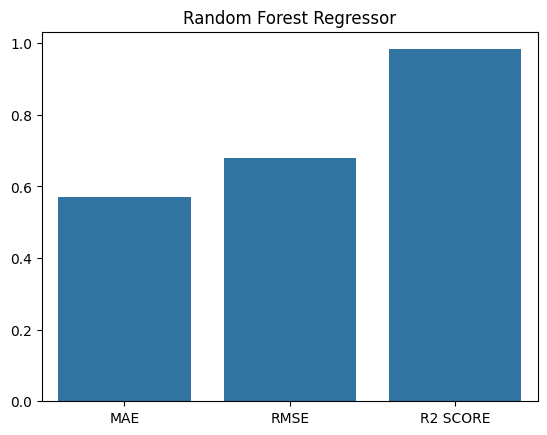

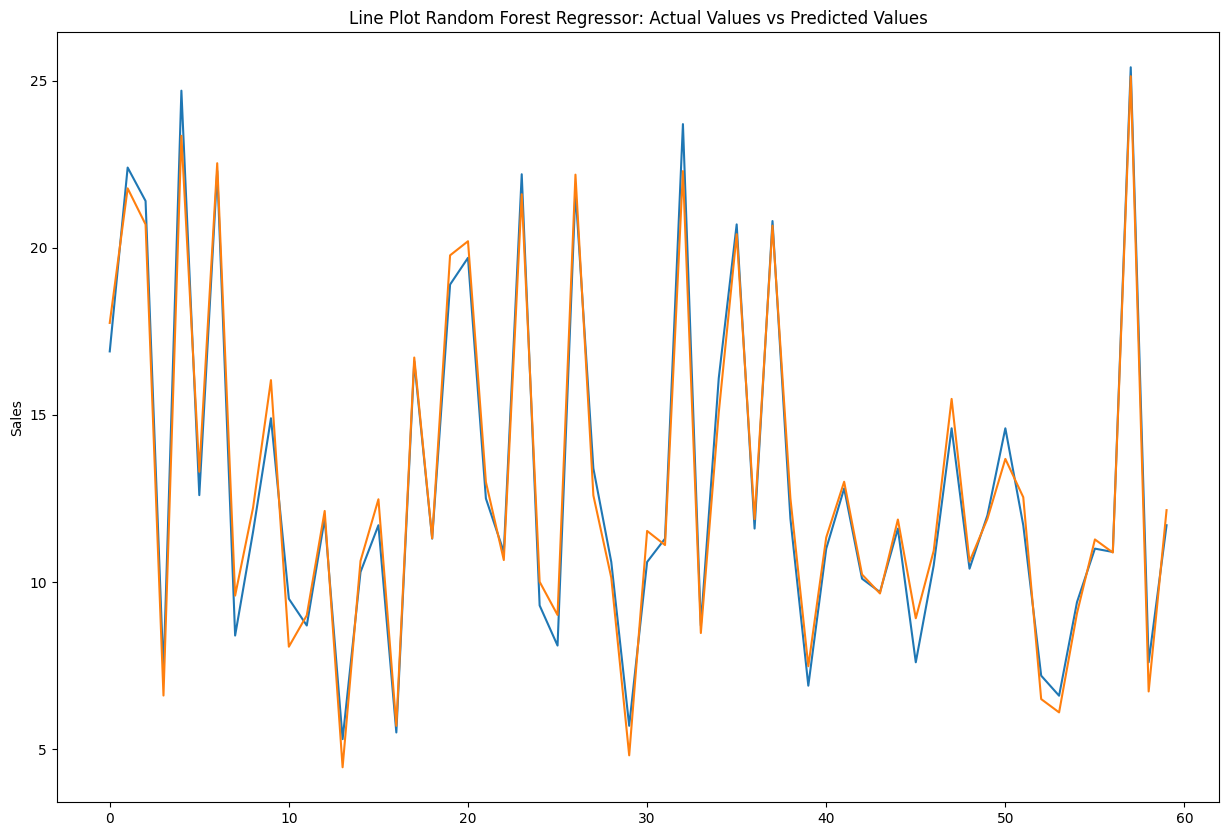

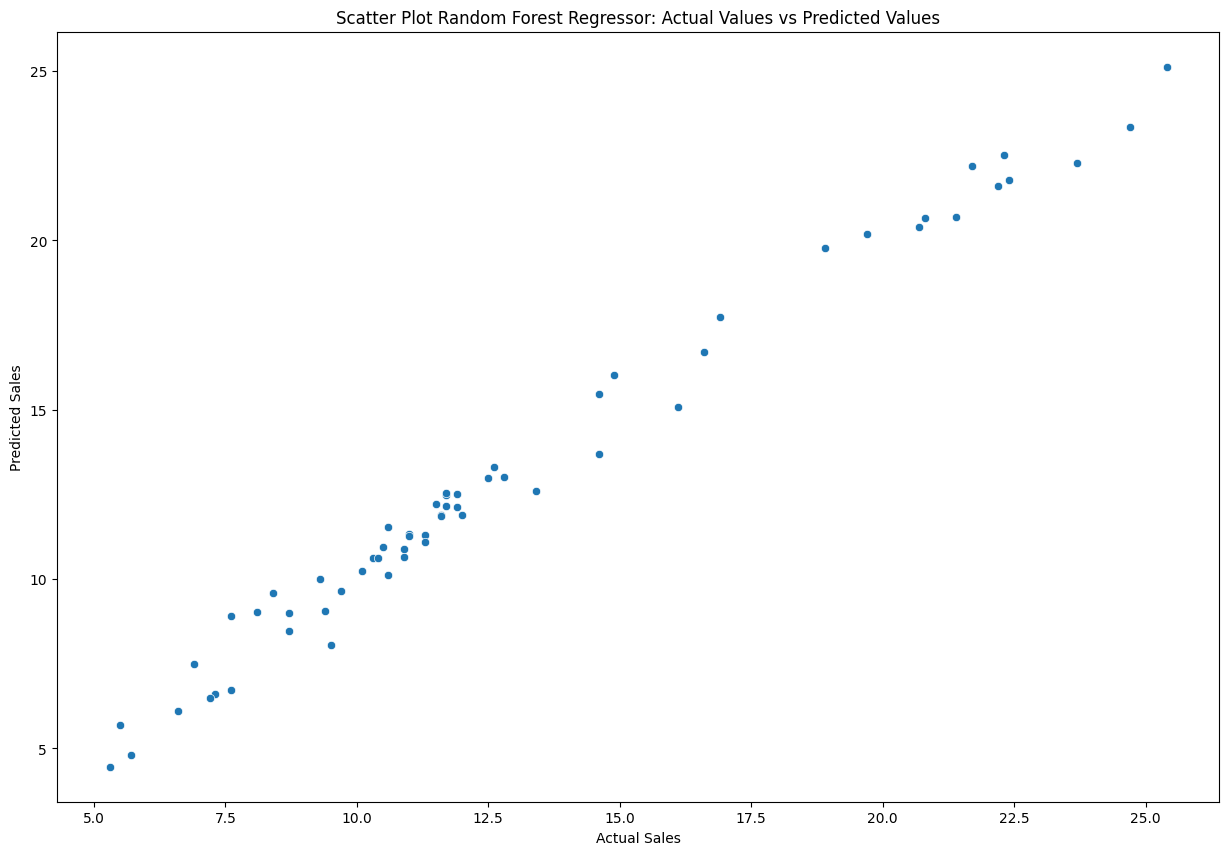

Decision Tree Regressor
The accuracy is 0.9430865302651902
The Mean Absolute Error is 0.9500000000000004
The Root Mean Squared Error is 1.2465953633797944
The Mean CrossValidation Score of 5 CV's is 0.8747411145396349


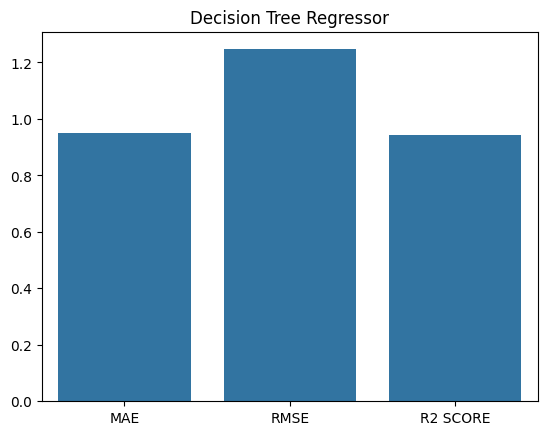

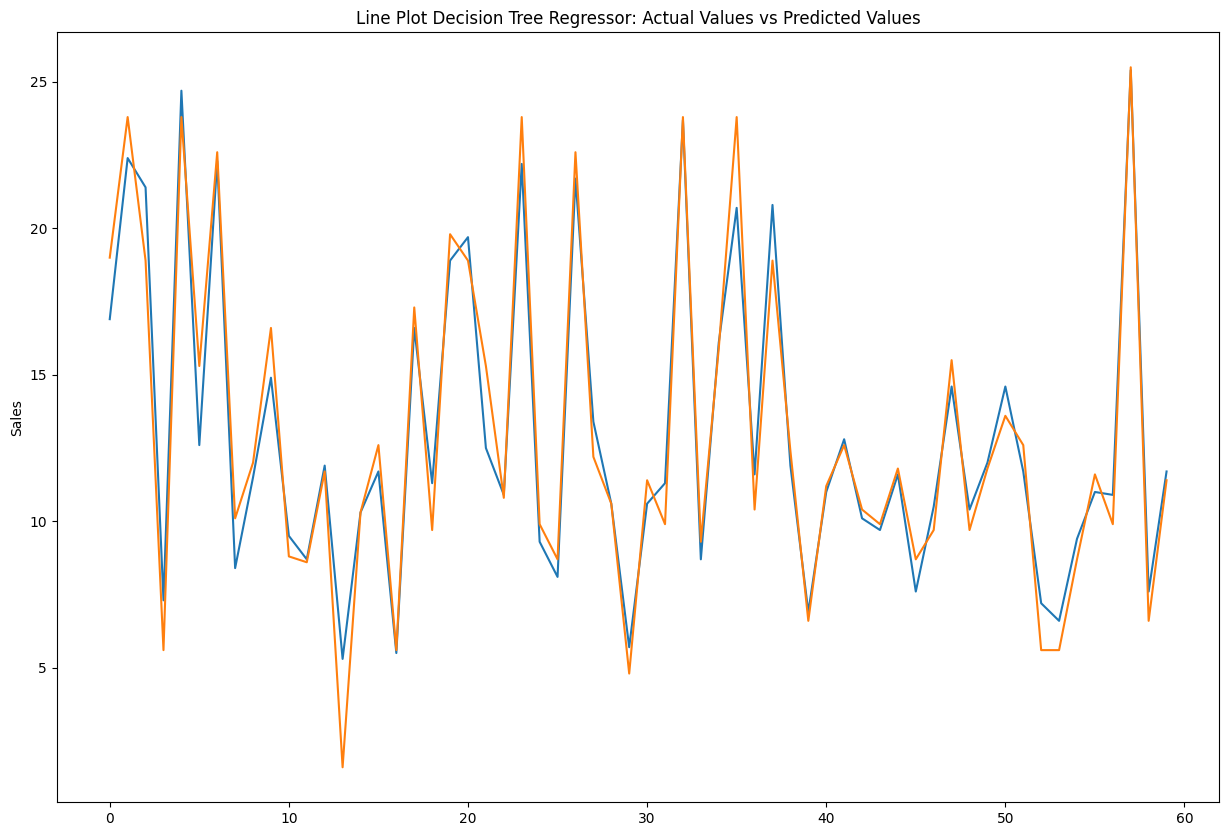

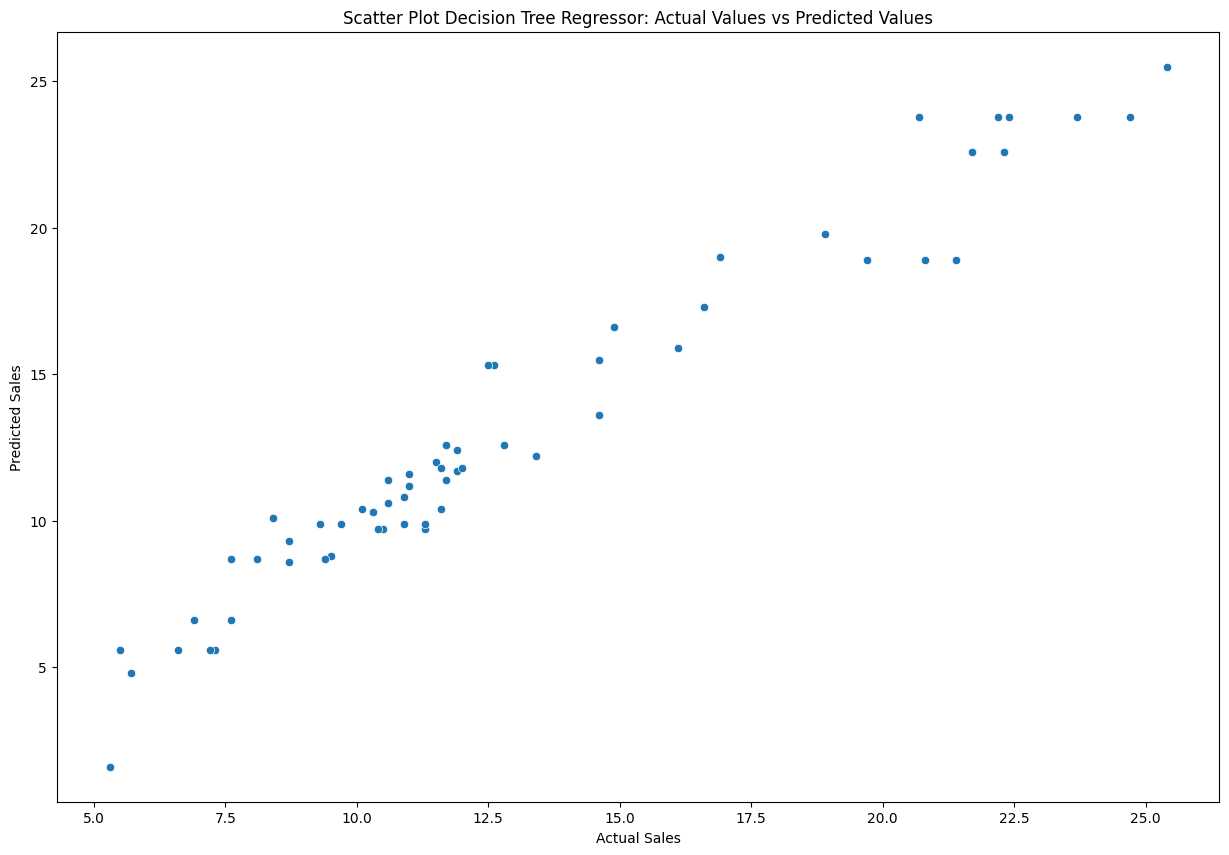

In [374]:
for name, model in models:
    print(name)
    model.fit(features_train, target_train)
    prediction = model.predict(features_test)
    r2 = r2_score(target_test, prediction)
    print(f'The accuracy is {r2}')
    mae = mean_absolute_error(target_test, prediction)
    print(f'The Mean Absolute Error is {mae}')
    rmse = root_mean_squared_error(target_test, prediction)
    print(f'The Root Mean Squared Error is {rmse}')
    print(f'The Mean CrossValidation Score of 5 CV\'s is {cross_val_score(model, features_test, target_test, cv=5).mean()}')
    metrics = {'MAE':mae, 'RMSE':rmse, 'R2 SCORE':r2}
    sns.barplot(metrics)
    plt.title(name)
    plt.show()
    plt.figure(figsize=(15,10))
    sns.lineplot(target_test.reset_index(drop=True))
    sns.lineplot(prediction)
    plt.title(f'Line Plot {name}: Actual Values vs Predicted Values')
    plt.show()
    plt.figure(figsize=(15,10))
    sns.scatterplot(x=target_test, y=prediction)
    plt.xlabel('Actual Sales')
    plt.ylabel('Predicted Sales')
    plt.title(f'Scatter Plot {name}: Actual Values vs Predicted Values')
    plt.show()